In [1]:

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
minor = AutoMinorLocator()
import math # for tan function and degrees function

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pylab as plt
import matplotlib.patches as mpatches 

 ---  model 0  --- 

 Parkes relative rate = 0.296 +/- 0.038 
 SKA    relative rate = 0.385 +/- 0.026 
fractional rate Parkes =  0.1272937693043289
fractional rate SKA =  0.06793662204867575

 ---  model 1  --- 

 Parkes relative rate = 1.481 +/- 0.117 
 SKA    relative rate = 1.718 +/- 0.081 
fractional rate Parkes =  0.07876359377087681
fractional rate SKA =  0.0472029960423371

 ---  model 2  --- 

 Parkes relative rate = 0.12 +/- 0.023 
 SKA    relative rate = 0.125 +/- 0.014 
fractional rate Parkes =  0.19321835661585918
fractional rate SKA =  0.11180339887498948

 ---  model 3  --- 

 Parkes relative rate = 0.095 +/- 0.022 
 SKA    relative rate = 0.097 +/- 0.013 
fractional rate Parkes =  0.23401261667248796
fractional rate SKA =  0.13520195964731105

 ---  model 4  --- 

 Parkes relative rate = 1.667 +/- 0.385 
 SKA    relative rate = 1.636 +/- 0.198 
fractional rate Parkes =  0.23094010767585033
fractional rate SKA =  0.1210225790770658

 ---  model 5  --- 

 Parkes relative r

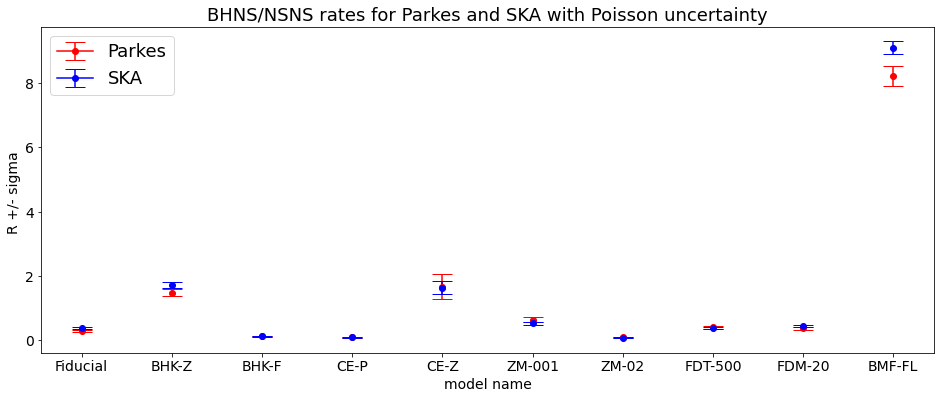

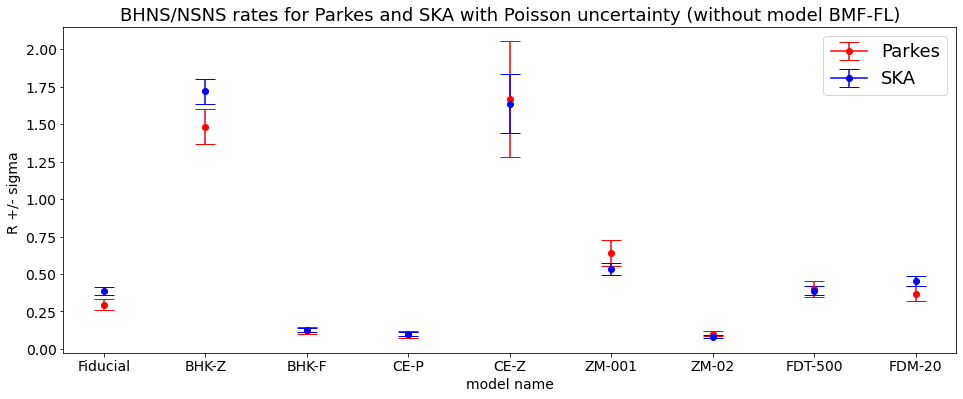

In [43]:
def errorPropagation(nBHNS, nNSNS):
    """ 
    returns relative rate and 1 sigma Poisson error
    
    input: number of BHNS and number of NSNS observed with telescope
    """
    
    # calculate relative Rate BHNS / NSNS 
    relRate = nBHNS / nNSNS
    
    # poisson sampling errors on quoted numbers
    sigma_BHNS = np.sqrt(nBHNS)
    sigma_NSNS = np.sqrt(nNSNS)
    
    # 1 sigmaa poisson error using error propagation
    BHNS_term =  np.abs(sigma_BHNS / nBHNS)**2 
    NSNS_term =  np.abs(sigma_NSNS / nNSNS)**2 
    
    sigma = relRate * np.sqrt(BHNS_term + NSNS_term)
    
    
    
    return relRate, sigma






Parkes_BHNS = np.asarray([8, 40, 3,2,5,9,4,8,7,641])*10
SKA_BHNS    = np.asarray([30, 122, 9, 6, 18, 24, 10, 24, 29, 2174])*10


Parkes_NSNS = np.asarray([27, 27, 25, 21, 3, 14, 40, 20, 19, 78])*10
SKA_NSNS    = np.asarray([78, 71, 72, 62, 11, 45, 121, 62, 64, 239])*10

modelnames = ['Fiducial', 'BHK-Z', 'BHK-F', 'CE-P', 'CE-Z', 'ZM-001', 'ZM-02', 'FDT-500', 'FDM-20', 'BMF-FL']


f, ax= plt.subplots(ncols=1,nrows=1, figsize=(16,6))

for ind_m in range(len(Parkes_BHNS)):
    
    nBHNS, nNSNS =   Parkes_BHNS[ind_m],  Parkes_NSNS[ind_m]
    R_parkes, sigma_parkes = errorPropagation(nBHNS, nNSNS)
    
    nBHNS, nNSNS = SKA_BHNS[ind_m], SKA_NSNS[ind_m]
    R_ska,  sigma_ska = errorPropagation(nBHNS, nNSNS)
    
    nround=3
    print(' ---  model %s  --- \n'%ind_m)
    print(' Parkes relative rate = %s +/- %s '%(np.round(R_parkes,nround), np.round(sigma_parkes,nround)))
    print(' SKA    relative rate = %s +/- %s '%(np.round(R_ska,nround),    np.round(sigma_ska, nround)))
    print('fractional rate Parkes = ', sigma_parkes/R_parkes)
    print('fractional rate SKA = ', sigma_ska/R_ska)
    print()   
    
    
    
    if ind_m==0:
        label_P = 'Parkes'
        label_S = 'SKA'
    else:
        label_P = None
        label_S = None 
        
#     plt.errorbar(x=ind_m, y=R_parkes, yerr=sigma_parkes, c='red', label='Parkes')
    plt.errorbar(x=ind_m, y=R_parkes, yerr=sigma_parkes, c='red',  label=label_P,capsize=10, marker='o')
    plt.errorbar(x=ind_m, y=R_ska,    yerr=sigma_ska,    c='blue', label=label_S,capsize=10, marker='o')
    
    plt.ylabel('R +/- sigma ', fontsize=14)
    plt.xlabel('model name', fontsize=14)
    plt.xticks(range(len(Parkes_BHNS[:])), modelnames[:])
    plt.tick_params(labelsize=14)
    plt.title('BHNS/NSNS rates for Parkes and SKA with Poisson uncertainty', fontsize=18)
    plt.legend(fontsize=18)
    
plt.show()
    
    
  


f, ax= plt.subplots(ncols=1,nrows=1, figsize=(16,6))
for ind_m in range(len(Parkes_BHNS[:-1])):
    
    nBHNS, nNSNS =   Parkes_BHNS[ind_m],  Parkes_NSNS[ind_m]
    R_parkes, sigma_parkes = errorPropagation(nBHNS, nNSNS)
    
    nBHNS, nNSNS = SKA_BHNS[ind_m], SKA_NSNS[ind_m]
    R_ska,  sigma_ska = errorPropagation(nBHNS, nNSNS)
    

    
    
    if ind_m==0:
        label_P = 'Parkes'
        label_S = 'SKA'
    else:
        label_P = None
        label_S = None     
    
#     plt.errorbar(x=ind_m, y=R_parkes, yerr=sigma_parkes, c='red', label='Parkes')
    plt.errorbar(x=ind_m, y=R_parkes, yerr=sigma_parkes, c='red',  label=label_P,capsize=10, marker='o')
    plt.errorbar(x=ind_m, y=R_ska,    yerr=sigma_ska,    c='blue', label=label_S,capsize=10, marker='o')
    
    plt.ylabel('R +/- sigma ', fontsize=14)
    plt.xlabel('model name', fontsize=14)
    
    plt.xticks(range(len(Parkes_BHNS[:-1])), modelnames[:-1])
    
    plt.title('BHNS/NSNS rates for Parkes and SKA with Poisson uncertainty (without model BMF-FL)', fontsize=18)
    plt.tick_params(labelsize=14)
    plt.legend(fontsize=18)
    
plt.show()




    